# **Import Library yang dibutuhkan**

In [ ]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Facebook_1.csv")
df.head()

,userName,score,at,content
0,Abet Mote,5,2024-04-27 14:34:12,ok
1,suff,1,2024-04-27 14:33:33,"sering terjadi masalah,baik saat menonton vidi..."
2,Rafki Ronaldi,1,2024-04-27 14:26:16,Akun ku kena hek sama orang sulawisi gara feksbuk
3,Tati Zega,5,2024-04-27 14:24:23,sangat Bagusss
4,Lucy Jonthan,5,2024-04-27 14:22:47,semoga tidak di hek orang lgi akun ku ini


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,ok,Abet Mote,2024-04-27 14:34:12
1,"sering terjadi masalah,baik saat menonton vidi...",suff,2024-04-27 14:33:33
2,Akun ku kena hek sama orang sulawisi gara feksbuk,Rafki Ronaldi,2024-04-27 14:26:16
3,sangat Bagusss,Tati Zega,2024-04-27 14:24:23
4,semoga tidak di hek orang lgi akun ku ini,Lucy Jonthan,2024-04-27 14:22:47
...,...,...,...
592,Facebok ku kok bisa tiap hari ngupdate manggan...,Jeki Saragih,2024-04-26 14:09:01
593,Tambahin fitur report postingan yg mengandung ...,Aziz Muzzamil,2024-04-26 14:05:59
594,godd,andi rinaa,2024-04-26 14:05:03
595,terimakasih pengalaman yang dulunya ga tau sek...,Satrio Dhita,2024-04-26 14:04:23


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,466,597,594
top,ok,Abet Mote,2024-04-27 04:47:17
freq,14,1,2


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(466, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,ok,Abet Mote,2024-04-27 14:34:12
1,sering terjadi masalahbaik saat menonton vidio...,suff,2024-04-27 14:33:33
2,akun ku kena hek sama orang sulawisi gara feksbuk,Rafki Ronaldi,2024-04-27 14:26:16
3,sangat bagusss,Tati Zega,2024-04-27 14:24:23
4,semoga tidak di hek orang lgi akun ku ini,Lucy Jonthan,2024-04-27 14:22:47
...,...,...,...
592,facebok ku kok bisa tiap hari ngupdate manggan...,Jeki Saragih,2024-04-26 14:09:01
593,tambahin fitur report postingan yg mengandung ...,Aziz Muzzamil,2024-04-26 14:05:59
594,godd,andi rinaa,2024-04-26 14:05:03
595,terimakasih pengalaman yang dulunya ga tau sek...,Satrio Dhita,2024-04-26 14:04:23


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [16]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok"
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,ok,Abet Mote,2024-04-27 14:34:12
1,sering terjadi masalahbaik saat menonton vidio...,suff,2024-04-27 14:33:33
2,akun ku kena hek sama orang sulawisi gara feksbuk,Rafki Ronaldi,2024-04-27 14:26:16
3,sangat bagusss,Tati Zega,2024-04-27 14:24:23
4,semoga tidak di hek orang lgi akun ku ini,Lucy Jonthan,2024-04-27 14:22:47
...,...,...,...
592,facebok ku kenapa bisa tiap hari ngupdate mang...,Jeki Saragih,2024-04-26 14:09:01
593,tambahin fitur report postingan yang mengandun...,Aziz Muzzamil,2024-04-26 14:05:59
594,godd,andi rinaa,2024-04-26 14:05:03
595,terimakasih pengalaman yang dulunya ga tau sek...,Satrio Dhita,2024-04-26 14:04:23


In [17]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.7 MB/s eta 0:00:00


In [18]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,,Abet Mote,2024-04-27 14:34:12
1,sering terjadi masalahbaik menonton vidioreels,suff,2024-04-27 14:33:33
2,akun ku kena hek sama orang sulawisi gara feksbuk,Rafki Ronaldi,2024-04-27 14:26:16
3,sangat bagusss,Tati Zega,2024-04-27 14:24:23
4,semoga di hek orang lgi akun ku,Lucy Jonthan,2024-04-27 14:22:47
...,...,...,...
592,facebok ku bisa tiap hari ngupdate mangganggu ...,Jeki Saragih,2024-04-26 14:09:01
593,tambahin fitur report postingan mengandung pro...,Aziz Muzzamil,2024-04-26 14:05:59
594,godd,andi rinaa,2024-04-26 14:05:03
595,terimakasih pengalaman dulunya ga tau sekarang...,Satrio Dhita,2024-04-26 14:04:23


In [19]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                     []
1      [sering, terjadi, masalahbaik, menonton, vidio...
2      [akun, ku, kena, hek, sama, orang, sulawisi, g...
3                                      [sangat, bagusss]
4                [semoga, di, hek, orang, lgi, akun, ku]
                             ...                        
592    [facebok, ku, bisa, tiap, hari, ngupdate, mang...
593    [tambahin, fitur, report, postingan, mengandun...
594                                               [godd]
595    [terimakasih, pengalaman, dulunya, ga, tau, se...
596    [sangat, mantap, mudah, digunakan, saya, dapat...
Name: content, Length: 466, dtype: object

In [20]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Facebook_1.csv', index = False)


In [22]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Facebook_1.csv', encoding = 'latin1')
df_clean

,content
0,NaN
1,sering jadi masalahbaik tonton vidioreels
2,akun ku kena hek sama orang sulawisi gara feksbuk
3,sangat bagusss
4,moga di hek orang lgi akun ku
...,...
461,facebok ku bisa tiap hari ngupdate mangganggu ...
462,tambahin fitur report postingan kandung promos...
463,godd
464,terimakasih alam dulunya ga tau sekarang jadi ...


# **Translate**

In [23]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [24]:
import pandas as pd
from easynmt import EasyNMT

In [25]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Facebook_1.csv', encoding='latin1')

In [26]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [27]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 7.09MB/s]                   


In [35]:
df2 = df_clean.fillna(method = 'bfill')
df2

,content
0,sering jadi masalahbaik tonton vidioreels
1,sering jadi masalahbaik tonton vidioreels
2,akun ku kena hek sama orang sulawisi gara feksbuk
3,sangat bagusss
4,moga di hek orang lgi akun ku
...,...
461,facebok ku bisa tiap hari ngupdate mangganggu ...
462,tambahin fitur report postingan kandung promos...
463,godd
464,terimakasih alam dulunya ga tau sekarang jadi ...


In [36]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Facebook_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [37]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Facebook_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.
1,1,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.
2,2,akun ku kena hek sama orang sulawisi gara feksbuk,My account has to be fixed with people sulawis...
3,3,sangat bagusss,Very good.
4,4,moga di hek orang lgi akun ku,"fontcolor="" # FFFF00""mugain hek peopleIgi my a..."
...,...,...,...
461,461,facebok ku bisa tiap hari ngupdate mangganggu ...,My facebok can be up to date every day. It's s...
462,462,tambahin fitur report postingan kandung promos...,Add a report feature to the birth post of the ...
463,463,godd,godd
464,464,terimakasih alam dulunya ga tau sekarang jadi ...,Thank you. Nature used to have no idea. Now it...


# **Labeling**

In [38]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Facebook_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.
1,1,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.
2,2,akun ku kena hek sama orang sulawisi gara feksbuk,My account has to be fixed with people sulawis...
3,3,sangat bagusss,Very good.
4,4,moga di hek orang lgi akun ku,"fontcolor="" # FFFF00""mugain hek peopleIgi my a..."
...,...,...,...
461,461,facebok ku bisa tiap hari ngupdate mangganggu ...,My facebok can be up to date every day. It's s...
462,462,tambahin fitur report postingan kandung promos...,Add a report feature to the birth post of the ...
463,463,godd,godd
464,464,terimakasih alam dulunya ga tau sekarang jadi ...,Thank you. Nature used to have no idea. Now it...


In [39]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [40]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 229
Netral = 185
Negatif = 52

Total Data Seluruhnya : 466


In [42]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.,Positif
1,1,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.,Positif
2,2,akun ku kena hek sama orang sulawisi gara feksbuk,My account has to be fixed with people sulawis...,Positif
3,3,sangat bagusss,Very good.,Positif
4,4,moga di hek orang lgi akun ku,"fontcolor="" # FFFF00""mugain hek peopleIgi my a...",Netral
...,...,...,...,...
461,461,facebok ku bisa tiap hari ngupdate mangganggu ...,My facebok can be up to date every day. It's s...,Positif
462,462,tambahin fitur report postingan kandung promos...,Add a report feature to the birth post of the ...,Netral
463,463,godd,godd,Netral
464,464,terimakasih alam dulunya ga tau sekarang jadi ...,Thank you. Nature used to have no idea. Now it...,Positif


In [43]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.,Positif
1,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.,Positif
2,akun ku kena hek sama orang sulawisi gara feksbuk,My account has to be fixed with people sulawis...,Positif
3,sangat bagusss,Very good.,Positif
4,moga di hek orang lgi akun ku,"fontcolor="" # FFFF00""mugain hek peopleIgi my a...",Netral
...,...,...,...
461,facebok ku bisa tiap hari ngupdate mangganggu ...,My facebok can be up to date every day. It's s...,Positif
462,tambahin fitur report postingan kandung promos...,Add a report feature to the birth post of the ...,Netral
463,godd,godd,Netral
464,terimakasih alam dulunya ga tau sekarang jadi ...,Thank you. Nature used to have no idea. Now it...,Positif


# **Visualisasi**


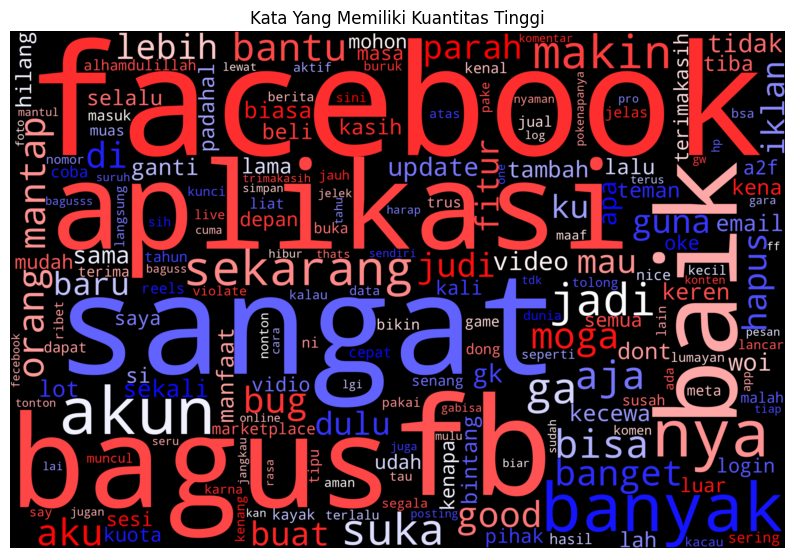

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


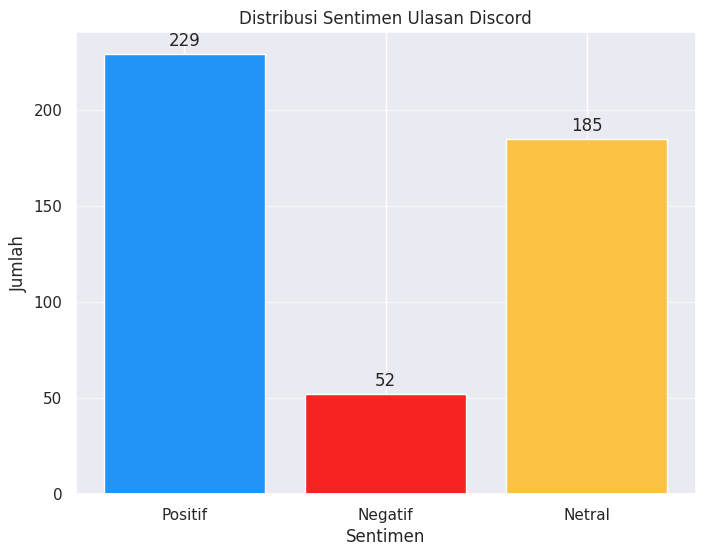

In [45]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")


In [46]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.,Positif
1,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.,Positif
2,akun ku kena hek sama orang sulawisi gara feksbuk,My account has to be fixed with people sulawis...,Positif
3,sangat bagusss,Very good.,Positif
6,akun sesi lama banget woi kena bug fixin lahh ...,It's an old session. I've had bug fixin'. I've...,Positif
...,...,...,...
458,suka banget,I'd love to.,Positif
459,update baru malah jadi berat bikin hp cepet pa...,"New updates are becoming heavy, making the mob...",Positif
461,facebok ku bisa tiap hari ngupdate mangganggu ...,My facebok can be up to date every day. It's s...,Positif
464,terimakasih alam dulunya ga tau sekarang jadi ...,Thank you. Nature used to have no idea. Now it...,Positif


In [47]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.,1
1,sering jadi masalahbaik tonton vidioreels,It's often a problem. Good. Watch vidioreels.,1
2,akun ku kena hek sama orang sulawisi gara feksbuk,My account has to be fixed with people sulawis...,1
3,sangat bagusss,Very good.,1
6,akun sesi lama banget woi kena bug fixin lahh ...,It's an old session. I've had bug fixin'. I've...,1
...,...,...,...
458,suka banget,I'd love to.,1
459,update baru malah jadi berat bikin hp cepet pa...,"New updates are becoming heavy, making the mob...",1
461,facebok ku bisa tiap hari ngupdate mangganggu ...,My facebok can be up to date every day. It's s...,1
464,terimakasih alam dulunya ga tau sekarang jadi ...,Thank you. Nature used to have no idea. Now it...,1


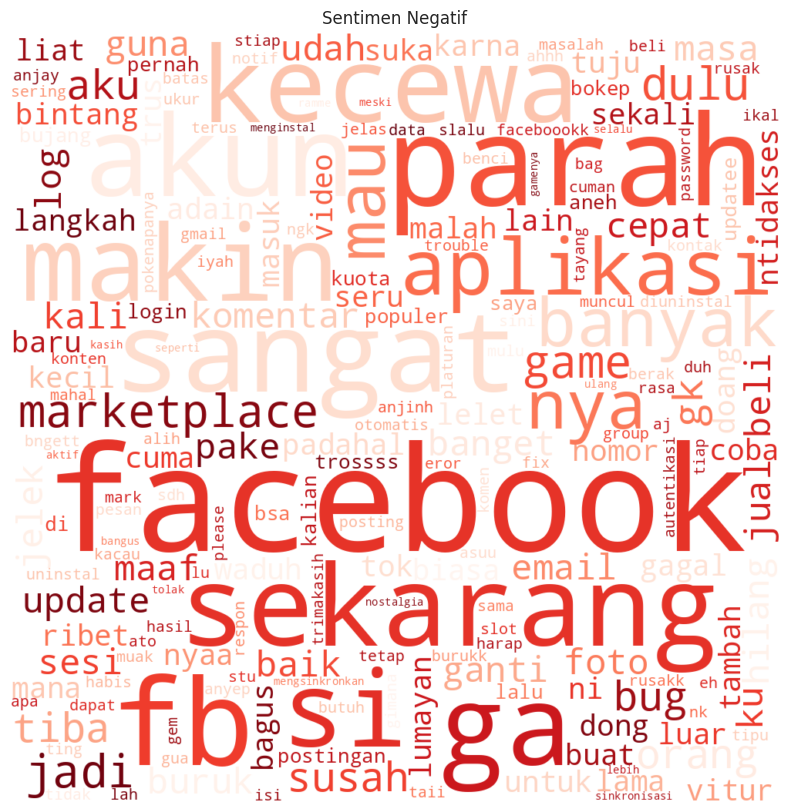

In [48]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

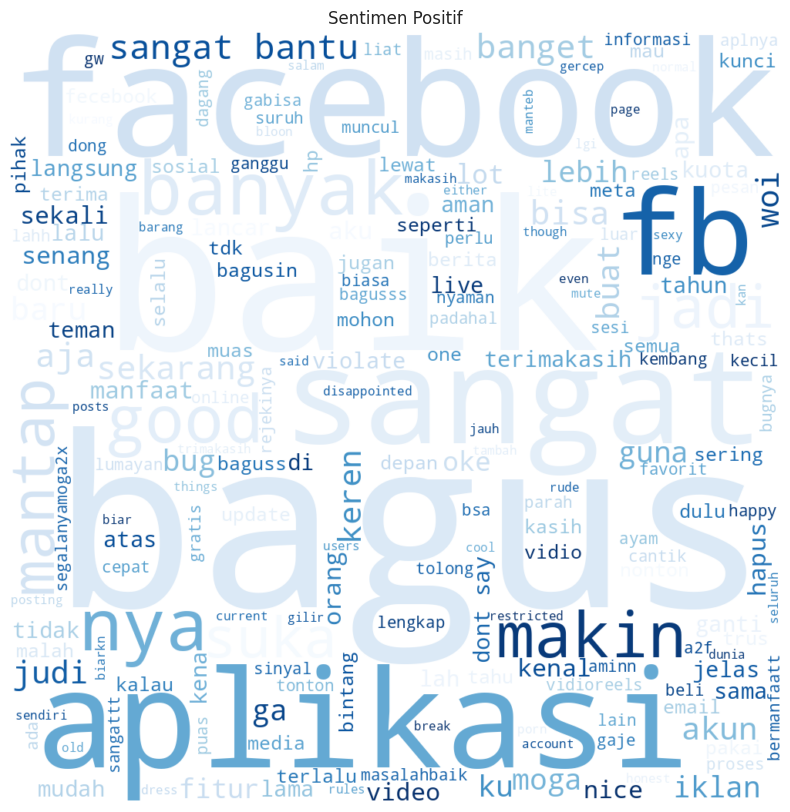

In [49]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [50]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    229
0     52
Name: count, dtype: int64

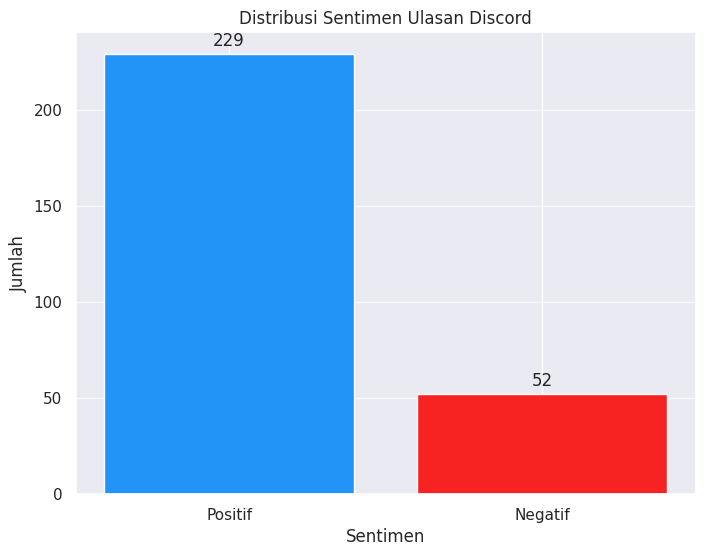

In [51]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Discord")

# **Data Preparation**

In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [55]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

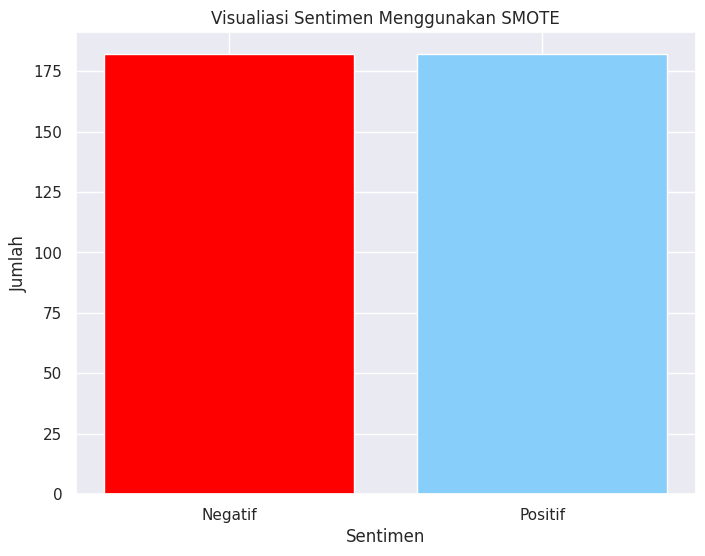

In [56]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [57]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [58]:
y_pred = naive_bayes.predict(X_test_vec)

In [59]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7719298245614035

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.41      0.70      0.52        10
     Positif       0.93      0.79      0.85        47

    accuracy                           0.77        57
   macro avg       0.67      0.74      0.68        57
weighted avg       0.83      0.77      0.79        57



# **Testing**


In [61]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : Akun ku hilang gara gara aplikasi facebook
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [62]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : Aplikasi bagus dan juga marketplacenya
Hasil Analisis Sentimen Untuk Teks Baru : Positif
